In [1]:
# !git add .
# !git commit -m "Init"
# !git push

In [2]:
# Loading the dependency 
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

import os

# Determine the current working directory
current_directory = os.getcwd()

# Go up two directory levels
root_directory = os.path.abspath(os.path.join(current_directory, "..", ".."))

# Set the current working directory to the root directory
os.chdir(root_directory)

# Verify that the current working directory has been updated
os.getcwd()

'/Users/danielalexander/Desktop/Advanced_ML_Algo/adv_ml_algo_assignment_2'

In [4]:
# !pip install -i https://test.pypi.org/simple/ my-krml-24591214

In [5]:
# ! pip install -i https://test.pypi.org/simple/ my-krml-149874

In [6]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

In [7]:
items_weekly_sell_price_df = pd.read_csv('data/raw/items_weekly_sell_prices.csv')
calendar_events_df= pd.read_csv('data/raw/calendar_events.csv')
calendar_df= pd.read_csv('data/raw/calendar.csv')
sales_train_df= pd.read_csv('data/raw/sales_train.csv')
sales_test_df= pd.read_csv('data/raw/sales_test.csv')
merged_df_v3= pd.read_csv('data/interim/merged_df_v3.csv')



/var/folders/w6/skyqkqrx1_q7pbxvh4_c7g_00000gn/T/ipykernel_7531/4028357538.py:6: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df_v3= pd.read_csv('data/interim/merged_df_v3.csv')


In [8]:
merged_df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34815174 entries, 0 to 34815173
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          object 
 1   item_id     object 
 2   dept_id     object 
 3   cat_id      object 
 4   store_id    object 
 5   state_id    object 
 6   day         object 
 7   sales       int64  
 8   date        object 
 9   wm_yr_wk    int64  
 10  d           object 
 11  week        int64  
 12  sell_price  float64
 13  event_name  object 
 14  event_type  object 
 15  revenue     float64
dtypes: float64(2), int64(3), object(11)
memory usage: 4.2+ GB


In [9]:
from datetime import datetime

#  Converting string date to datetime format

merged_df_v3['date'] = pd.to_datetime(merged_df_v3['date'])

In [10]:
# 

grouped = merged_df_v3.groupby(['date'])  # Group the DataFrame by the 'Date' column
grouped_df = grouped['revenue'].sum().reset_index()  # Calculate the sum of 'revenue' for each group




In [11]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1541 non-null   datetime64[ns]
 1   revenue  1541 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.2 KB


In [12]:
grouped_df.set_index('date', inplace=True)
grouped_df.tail()


,revenue
date,
2015-04-14,102896.92
2015-04-15,106913.88
2015-04-16,98373.49
2015-04-17,103030.58
2015-04-18,132625.89


In [13]:
cutoff_date = pd.to_datetime('2015-02-18')

train_df= grouped_df[grouped_df.index < cutoff_date]
test_df = grouped_df[grouped_df.index >= cutoff_date]


/var/folders/w6/skyqkqrx1_q7pbxvh4_c7g_00000gn/T/ipykernel_7531/2679418197.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['rev_diff'] = train_df['revenue'].diff(d)
/Users/danielalexander/Library/Caches/pypoetry/virtualenvs/assignment-2-adv-ml-algo-F103_LJ4-py3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/danielalexander/Library/Caches/pypoetry/virtualenvs/assignment-2-adv-ml-algo-F103_LJ4-py3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)

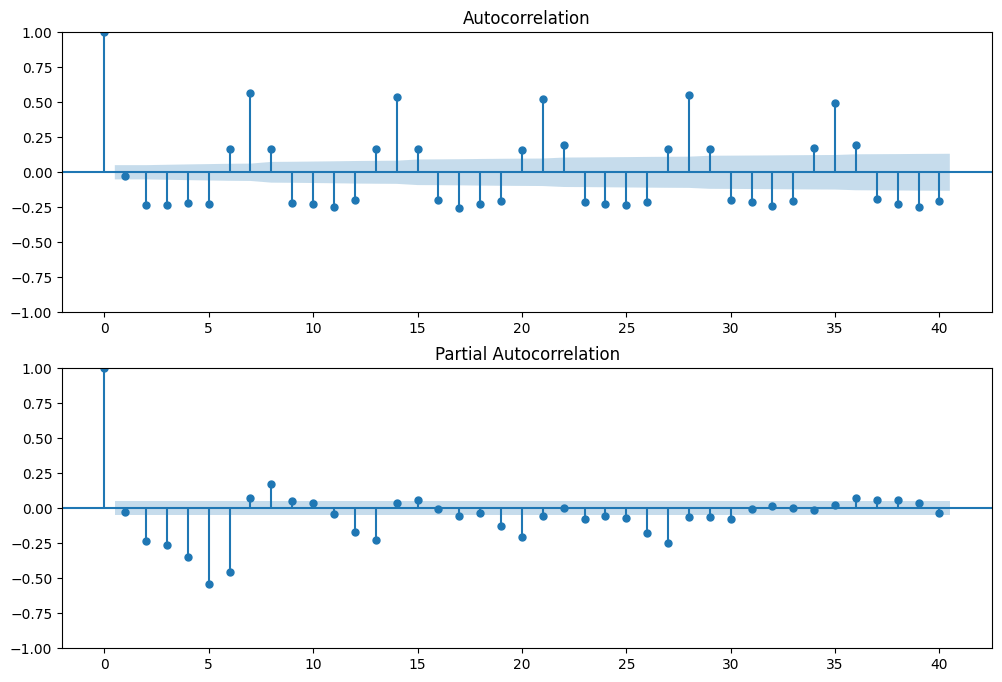

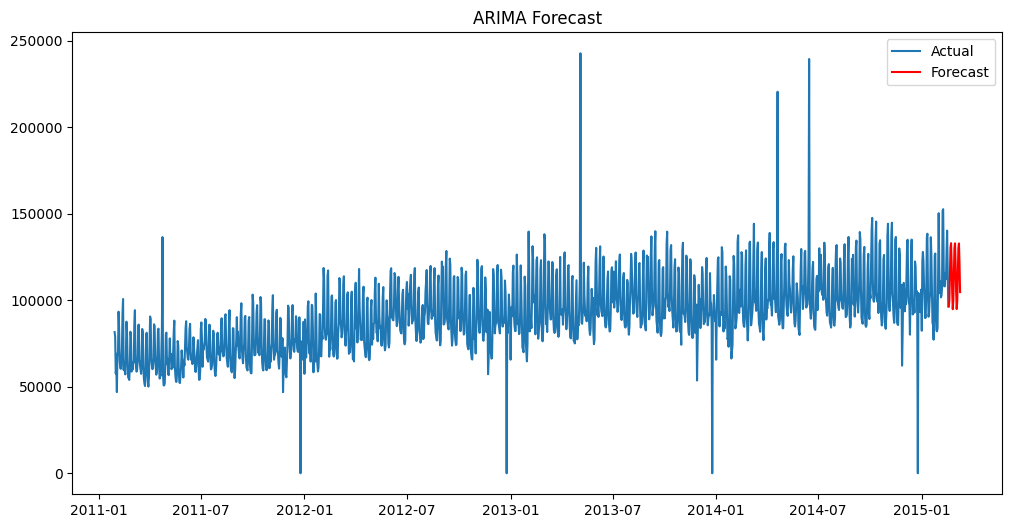

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load your DataFrame and preprocess the data as mentioned above

# Perform differencing if needed to make the data stationary
d = 1
train_df['rev_diff'] = train_df['revenue'].diff(d)

# ACF and PACF plots to determine p and q
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(train_df['rev_diff'].dropna(), lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(train_df['rev_diff'].dropna(), lags=40, ax=ax2)

# Fit ARIMA model
p, q = 4, 4  # Example values for p and q
model = sm.tsa.ARIMA(train_df['revenue'], order=(p, d, q))
results = model.fit()

# Make predictions
forecast_periods = 21  # Number of periods to forecast
forecast = results.forecast(steps=forecast_periods)


# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_df['revenue'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()


In [15]:
from joblib import dump

dump(results,'models/forecasting/ARIMA_model.joblib')

['models/forecasting/ARIMA_model.joblib']

In [16]:
#  Grabbing the date from test_df

date=test_df.reset_index()['date']
date_list=date.to_list()

In [17]:
#  Creating the prediction for the test_df

test_df['prediction']=0


for date in date_list:
    pred=results.predict(date)[0]
    test_df.loc[date,'prediction']=pred
    
test_df.head()


/var/folders/w6/skyqkqrx1_q7pbxvh4_c7g_00000gn/T/ipykernel_7531/3272396841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['prediction']=0


,revenue,prediction
date,,
2015-02-18,87432.65,96422.577347
2015-02-19,90275.14,100174.694733
2015-02-20,103152.04,114773.629183
2015-02-21,132141.43,130511.663226
2015-02-22,136822.14,133029.094534


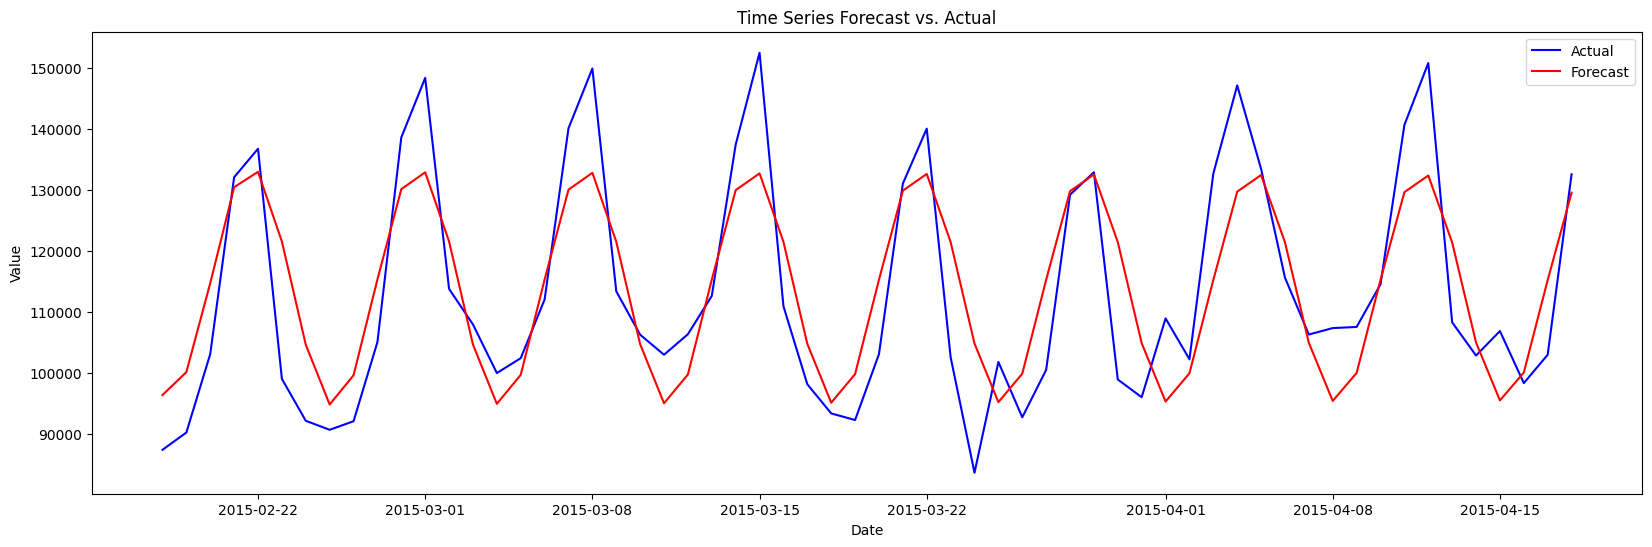

In [18]:
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your real and predicted values
plt.figure(figsize=(20, 6))

# Plot the actual test data
plt.plot(test_df.index, test_df['revenue'], label='Actual', color='blue')

# Plot the forecasted data
plt.plot(test_df.index, test_df['prediction'], label='Forecast', color='red')

# Add labels and a legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.title('Time Series Forecast vs. Actual')
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error

mae_test = mean_absolute_error(test_df['revenue'], test_df['prediction'])
print(f"MAE for test: {mae_test} ")

MAE for test: 8679.845370286052 
